In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_paths_1 = ['/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/01/DJI_01.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/01/DJI_02.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/01/DJI_03.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/01/DJI_04.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/01/DJI_05.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/01/DJI_06.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/01/DJI_07.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/01/DJI_08.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/01/DJI_09.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/01/DJI_10.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/01/DJI_11.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/01/DJI_12.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/01/DJI_13.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/01/DJI_14.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/01/DJI_15.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/01/DJI_16.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/01/DJI_17.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/01/DJI_18.JPG']
image_paths_2 = ['/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/02/DJI_01.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/02/DJI_02.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/02/DJI_03.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/02/DJI_04.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/02/DJI_05.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/02/DJI_06.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/02/DJI_07.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/02/DJI_08.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/02/DJI_09.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/02/DJI_10.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/02/DJI_11.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/02/DJI_12.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/02/DJI_13.JPG',
               '/mnt/hdd02/cleaned_ba_copter_videos/calib/response_function_calib/02/DJI_14.JPG']
exposure_times_1 = [1/100.0, 1/80.0, 1/60.0, 1/50.0, 1/40.0, 1/30.0, 1/25.0, 1/20.0, 1/15.0, 1/12.5, 1/10.0, 1/8.0, 1/6.25, 1/5.0, 1/4.0, 1/3.0, 1/2.5, 1/2.0]
exposure_times_2 = [1/1000.0, 1/800.0, 1/640.0, 1/500.0, 1/400.0, 1/320.0, 1/240.0, 1/200.0, 1/160.0, 1/120.0, 1/100.0, 1/80.0, 1/60.0, 1/50.0]


In [3]:
def load_images(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path)
        images.append(img)
    return images

In [4]:
def calculate_response(images, exposure_times):
    images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]
    calibrator = cv2.createCalibrateDebevec()
    response = calibrator.process(images, times=np.array(exposure_times, dtype=np.float32))
    return response

In [5]:
def plot_response_curve(response):    
    plt.figure(figsize=(10, 5))
    plt.plot(response)
    plt.xlabel('Pixel Value')
    plt.ylabel('Normalized Log Exposure')
    plt.title('Camera Response Function')
    plt.grid(True)
    plt.xlim([0, 255])
    plt.ylim([0, 255])
    plt.show()

In [6]:
def plot_heatmap(image, response):
    # Convert image to float and normalize
    image = image.astype(np.float32) / 255.0
    
    # Apply the camera response function to the image
    image_response = np.interp(image * 255, np.arange(256), response[:, 0])
    
    # Normalize the response image for better visualization
    image_response = 255 * (image_response - np.min(image_response)) / (np.max(image_response) - np.min(image_response))
    image_response = image_response.astype(np.uint8)
    
    # Plot the heatmap
    plt.figure(figsize=(10, 5))
    plt.imshow(image_response, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Log Exposure')
    plt.title('Heatmap of Image with Camera Response Function')
    plt.show()


In [7]:
def print_normalized_map(response_normalized_1, response_normalized_2):
    # Ensure both inputs are numpy arrays and have the same shape
    response_normalized_1 = np.array(response_normalized_1)
    response_normalized_2 = np.array(response_normalized_2)
    
    if response_normalized_1.shape != response_normalized_2.shape:
        raise ValueError("Both response_normalized arrays must have the same shape")
    
    # Calculate the mean of the two normalized responses
    response_mean = (response_normalized_1 + response_normalized_2) / 2
    
    # Convert the mean response to a comma-separated string
    mean_list = response_mean.flatten().tolist()
    mean_str = ','.join(map(str, mean_list))
    
    print(mean_str)

    return response_mean

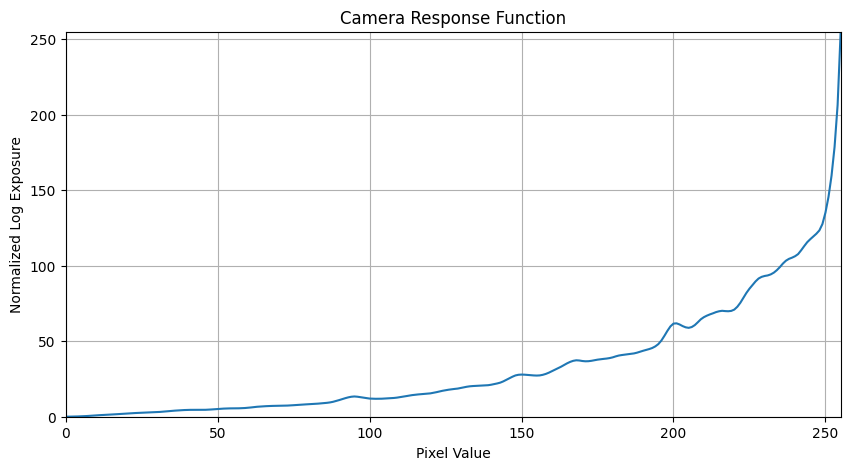

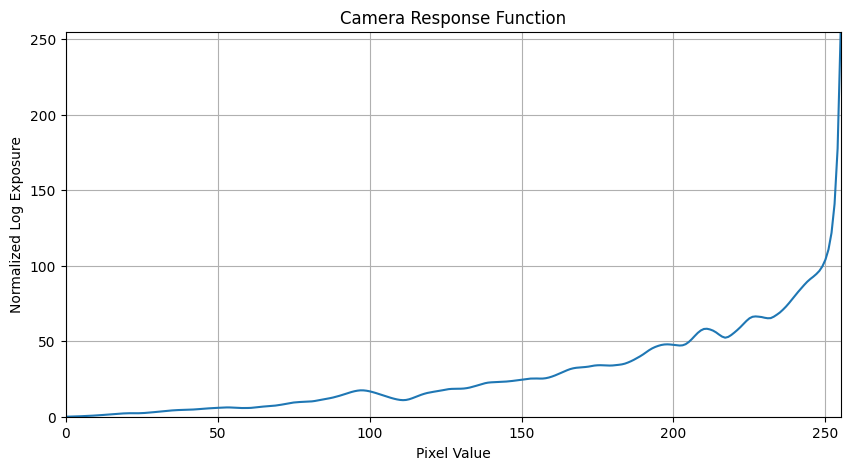

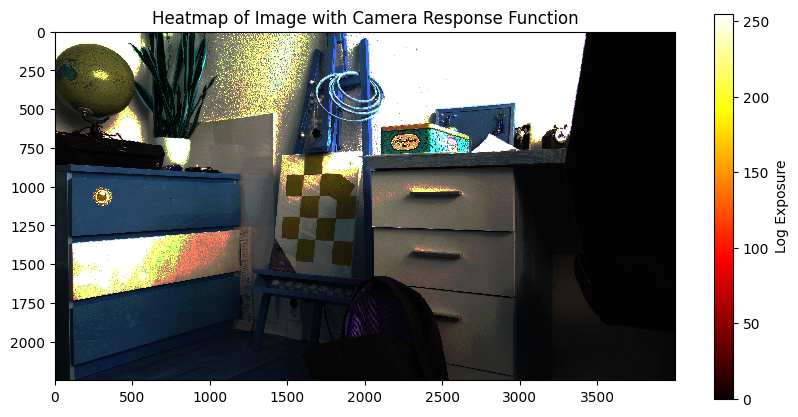

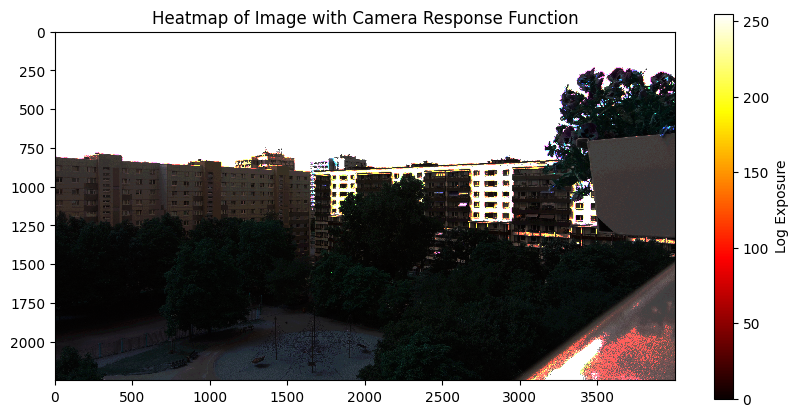

0.0,0.04544326290488243,0.0967293307185173,0.15529915690422058,0.22244523465633392,0.29903262853622437,0.3859226703643799,0.4848315417766571,0.5948878526687622,0.7150704264640808,0.8480983972549438,0.9917221069335938,1.1335678100585938,1.2690069675445557,1.3956737518310547,1.52634859085083,1.673337459564209,1.818766474723816,1.9531795978546143,2.0818557739257812,2.1999430656433105,2.288665294647217,2.335930347442627,2.3727567195892334,2.4203195571899414,2.499255657196045,2.6015536785125732,2.716768264770508,2.838998317718506,2.9744653701782227,3.1229734420776367,3.2921996116638184,3.481818675994873,3.68501615524292,3.87361478805542,4.036316871643066,4.179388523101807,4.294747352600098,4.39169454574585,4.474225044250488,4.549678802490234,4.607895851135254,4.659358024597168,4.720134735107422,4.802337646484375,4.89570951461792,4.994471073150635,5.10105037689209,5.235577583312988,5.375078201293945,5.4995527267456055,5.612752914428711,5.726137161254883,5.813690662384033,5.831327438354492,5.

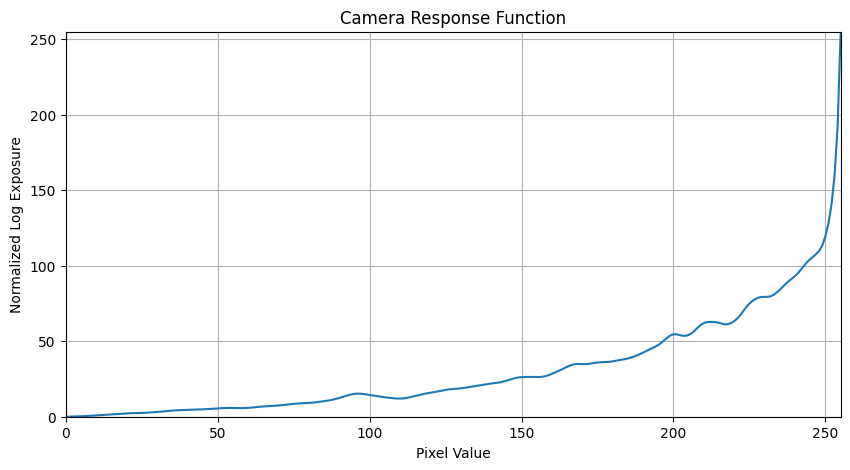

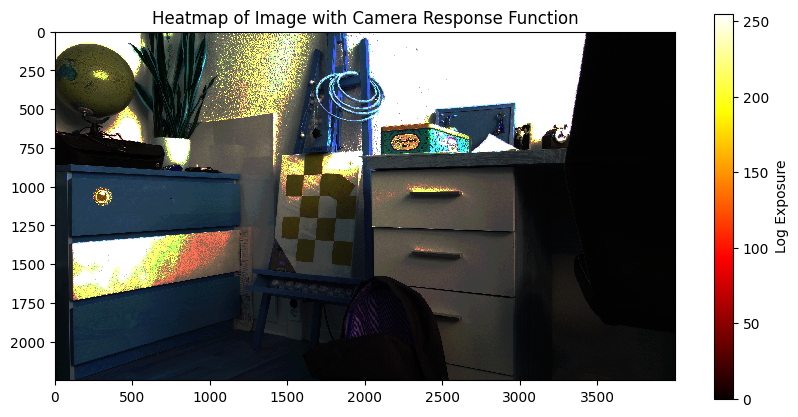

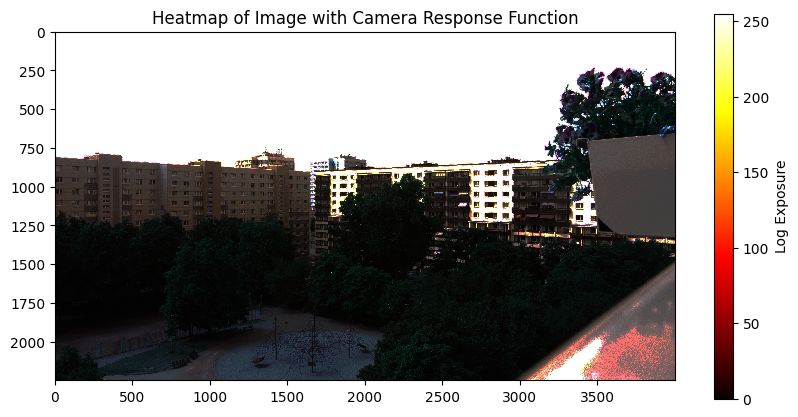

In [8]:
images_1 = load_images(image_paths_1)
images_2 = load_images(image_paths_2)

response_1 = calculate_response(images_1, exposure_times_1)
response_2 = calculate_response(images_2, exposure_times_2)

response_normalized_1 = 255 * (response_1 - np.min(response_1)) / (np.max(response_1) - np.min(response_1))
response_normalized_2 = 255 * (response_2 - np.min(response_2)) / (np.max(response_2) - np.min(response_2))

plot_response_curve(response_normalized_1)
plot_response_curve(response_normalized_2)

plot_heatmap(images_1[10], response_1)
plot_heatmap(images_2[6], response_2)

mean_response = print_normalized_map(response_normalized_1, response_normalized_2)
plot_response_curve(mean_response)
plot_heatmap(images_1[10], mean_response)
plot_heatmap(images_2[6], mean_response)